In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
eat = pd.read_csv('food.csv')
eat.head(1)

,id,date,time,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
0,gaori,2019-08-02,22:00,0,0,0,0,1,0,100,1,0


In [6]:
poop = pd.read_csv('stool.csv')
poop.head(1)
poop[poop['menstruation'] == 1].head(1)

,id,date,time,minute,feel,menstruation
30,hae,2019-08-07,9:00,5,2,1


In [7]:
poop.loc[poop['feel'] == 1, 'feel(text)'] = 'Try'
poop.loc[poop['feel'] == 2, 'feel(text)'] = 'Soso'
poop.loc[poop['feel'] == 3, 'feel(text)'] = 'Good'

poop[['feel', 'feel(text)']].head()

,feel,feel(text)
0,2,Soso
1,2,Soso
2,2,Soso
3,2,Soso
4,3,Good


In [8]:
eat.dtypes

id               object
date             object
time             object
spicy             int64
cold              int64
coffee            int64
soda              int64
alcohol           int64
mlik              int64
water             int64
greens            int64
lactobacillus     int64
dtype: object

# 개인별 총 배변 시간

In [9]:
poop_minute = poop.groupby('id')['minute'].sum().reset_index()
poop_minute

,id,minute
0,gaori,135
1,hae,193
2,kairos,32
3,panda,111
4,squirrel,83
5,wolf,68


In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

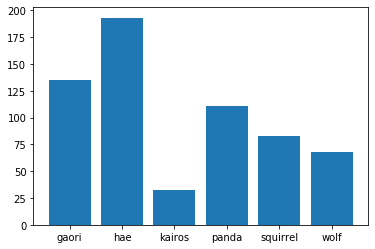

In [12]:
plt.bar('id', 'minute', data=poop_minute)
plt.show()

# 개인별 배변 횟수

In [13]:
poop_count = poop.groupby('id')['feel'].count().reset_index()
poop_count

,id,feel
0,gaori,25
1,hae,28
2,kairos,9
3,panda,13
4,squirrel,20
5,wolf,15


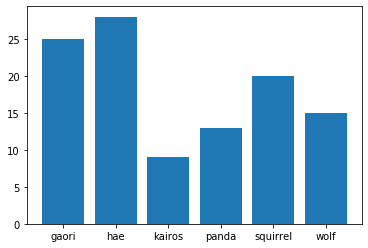

In [14]:
plt.bar('id', 'feel', data=poop_count)
plt.show()

In [15]:
poop_feel = poop.groupby(['id', 'feel(text)'])['date'].count().reset_index()
poop_feel

,id,feel(text),date
0,gaori,Good,14
1,gaori,Soso,10
2,gaori,Try,1
3,hae,Good,18
4,hae,Soso,10
5,kairos,Good,4
6,kairos,Soso,3
7,kairos,Try,2
8,panda,Good,9
9,panda,Soso,4


# 개인별 쾌변 비율

<BarContainer object of 2 artists>

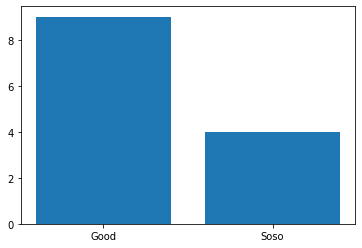

In [20]:
poop_feel_panda = poop_feel[poop_feel['id'] == 'panda']

plt.bar('feel(text)', 'date', data=poop_feel_panda)

<BarContainer object of 2 artists>

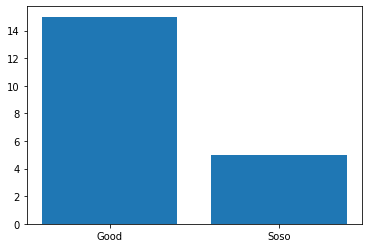

In [21]:
poop_feel_squirrel = poop_feel[poop_feel['id'] == 'squirrel']

plt.bar('feel(text)', 'date', data=poop_feel_squirrel)

<BarContainer object of 3 artists>

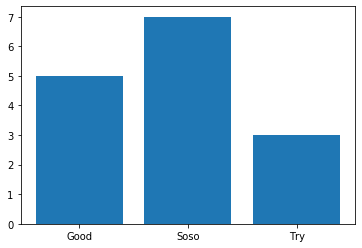

In [22]:
poop_feel_wolf = poop_feel[poop_feel['id'] == 'wolf']

plt.bar('feel(text)', 'date', data=poop_feel_wolf)

<BarContainer object of 3 artists>

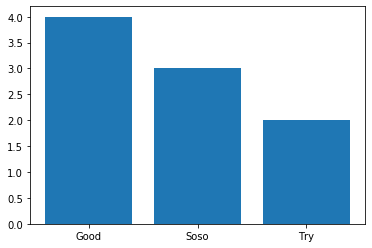

In [23]:
poop_feel_kairos = poop_feel[poop_feel['id'] == 'kairos']

plt.bar('feel(text)', 'date', data=poop_feel_kairos)

# 생리 여부에 따른 쾌변

In [24]:
hae_on_p = poop[(poop['menstruation'] == 1) & (poop['id'] == 'hae')]
hae_off_p = poop[(poop['menstruation'] != 1) & (poop['id'] == 'hae')]
hae_on_p.head()

,id,date,time,minute,feel,menstruation,feel(text)
30,hae,2019-08-07,9:00,5,2,1,Soso
31,hae,2019-08-08,10:00,4,2,1,Soso
32,hae,2019-08-09,11:00,10,2,1,Soso
33,hae,2019-08-09,1:00,15,2,1,Soso
34,hae,2019-08-09,21:00,10,2,1,Soso


# 해달 생리중, 평소 쾌변상태 비교

In [69]:
poop[poop['id'] == 'hae'].pivot_table(index='menstruation', columns='feel(text)', values='feel', aggfunc='count')

feel(text),Good,Soso
menstruation,,
0,16,2
1,2,8


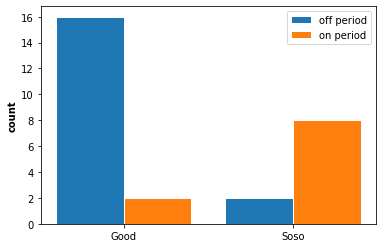

In [89]:
# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = [16, 2] # 평소
bars2 = [2, 8] # 생리중
# bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
# r1 = np.arange(len(bars1))
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.ylabel('count', fontweight='bold')
# plt.xlabel('feel', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
plt.xticks([r + barWidth /2 for r in range(len(bars1))], ['Good', 'Soso'])
 
# Create legend & Show graphic
plt.legend(['off period', 'on period'])  # 범례
plt.show()

<BarContainer object of 18 artists>

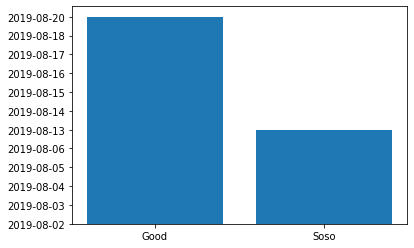

In [27]:
# 해달 평소
plt.bar('feel(text)', 'date', data=hae_off_p)

<BarContainer object of 10 artists>

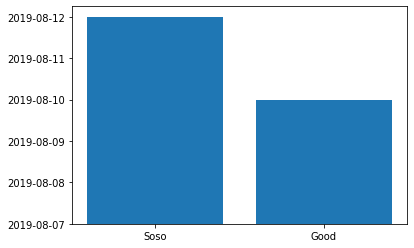

In [26]:
# 해달 생리중
plt.bar('feel(text)', 'date', data=hae_on_p)

# 다람쥐 생리중, 평소 쾌변상태 비교

In [86]:
poop[poop['id'] == 'squirrel'].pivot_table(index='menstruation', columns='feel(text)', values='feel', aggfunc='count')

feel(text),Good,Soso
menstruation,,
0,10.0,NaN
1,5.0,5.0


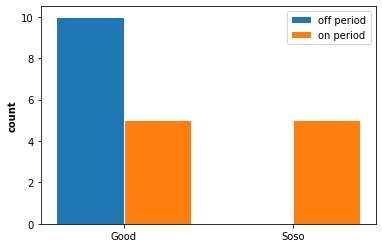

In [87]:
# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = [10, 0] # 평소
bars2 = [5, 5] # 생리중
# bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
# r1 = np.arange(len(bars1))
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.ylabel('count', fontweight='bold')
# plt.xlabel('feel', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
plt.xticks([r + barWidth /2 for r in range(len(bars1))], ['Good', 'Soso'])
 
# Create legend & Show graphic
plt.legend(['off period', 'on period'])  # 범례
plt.show()

In [64]:
squirrel_on_p = poop[(poop['menstruation'] == 1) & (poop['id'] == 'squirrel')]
squirrel_off_p = poop[(poop['menstruation'] != 1) & (poop['id'] == 'squirrel')]
squirrel_on_p.head()

,id,date,time,minute,feel,menstruation,feel(text)
81,squirrel,2019-08-07,8:00,4,3,1,Good
82,squirrel,2019-08-08,19:30,5,3,1,Good
83,squirrel,2019-08-09,7:50,4,2,1,Soso
84,squirrel,2019-08-10,8:00,4,3,1,Good
85,squirrel,2019-08-11,8:50,5,2,1,Soso


<BarContainer object of 10 artists>

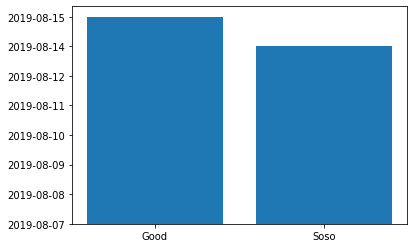

In [83]:
plt.bar('feel(text)', 'date', data=squirrel_on_p)

<BarContainer object of 10 artists>

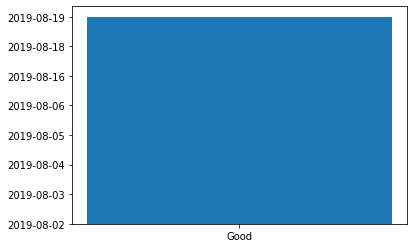

In [84]:
plt.bar('feel(text)', 'date', data=squirrel_off_p)

# 물 섭취량

In [95]:
water = eat.groupby('id')['water'].sum().reset_index()
water

,id,water
0,gaori,19500
1,hae,17800
2,kairos,1200
3,panda,10200
4,squirrel,8700
5,wolf,1400


Text(0, 0.5, 'water(ml)')

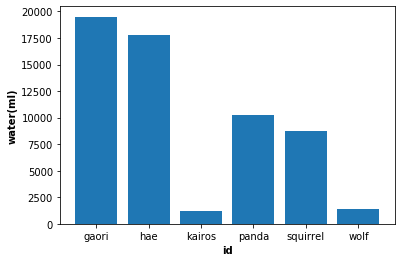

In [102]:
plt.bar('id', 'water', data=water)

plt.xlabel('id', fontweight='bold')
plt.ylabel('water(ml)', fontweight='bold')

# 매운 것

<BarContainer object of 6 artists>

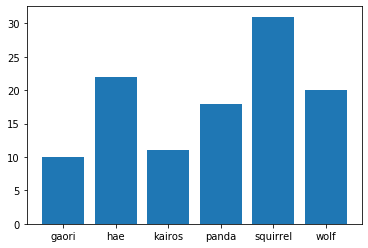

In [105]:
spicy = eat.groupby('id')['spicy'].sum().reset_index()
plt.bar('id', 'spicy', data=spicy)

<BarContainer object of 6 artists>

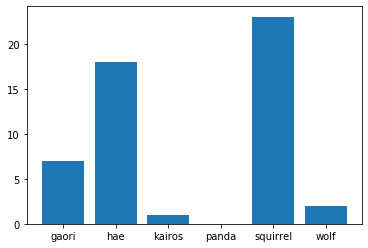

In [106]:
greens = eat.groupby('id')['greens'].sum().reset_index()
plt.bar('id', 'greens', data=greens)

<BarContainer object of 6 artists>

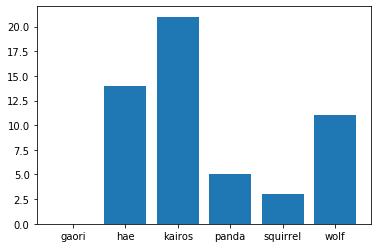

In [107]:
coffee = eat.groupby('id')['coffee'].sum().reset_index()
plt.bar('id', 'coffee', data=coffee)

<BarContainer object of 6 artists>

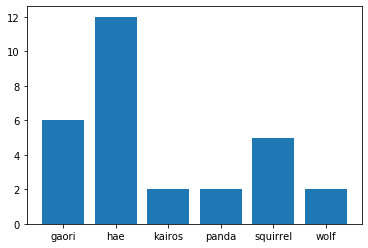

In [108]:
soda = eat.groupby('id')['soda'].sum().reset_index()
plt.bar('id', 'soda', data=soda)

<BarContainer object of 6 artists>

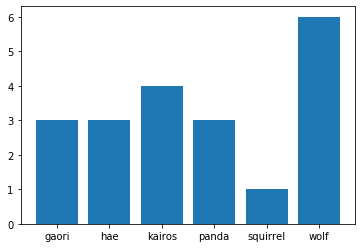

In [109]:
alcohol = eat.groupby('id')['alcohol'].sum().reset_index()
plt.bar('id', 'alcohol', data=alcohol)

<BarContainer object of 6 artists>

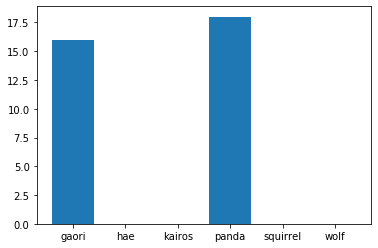

In [110]:
lactobacillus = eat.groupby('id')['lactobacillus'].sum().reset_index()
plt.bar('id', 'lactobacillus', data=lactobacillus)

<BarContainer object of 6 artists>

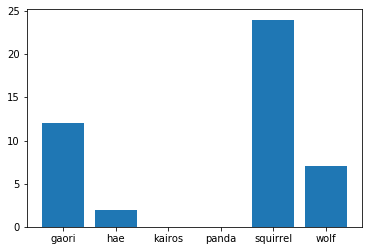

In [118]:
mlik = eat.groupby('id')['mlik'].sum().reset_index()
plt.bar('id', 'mlik', data=mlik)

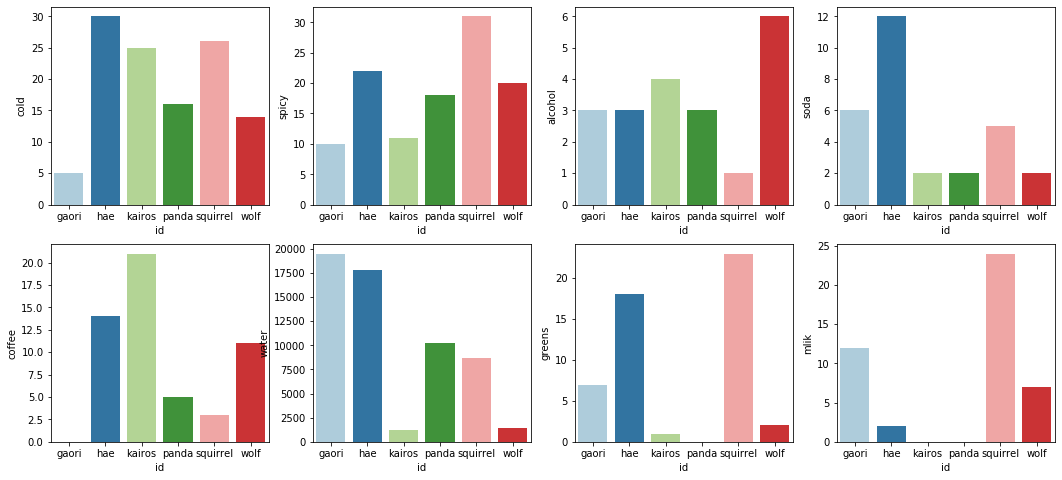

In [120]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)

figure.set_size_inches(18, 8)

sns.barplot('id', 'cold', data=cold, ax=ax1, palette='Paired')
sns.barplot('id', 'spicy', data=spicy, ax=ax2, palette='Paired')
sns.barplot('id', 'alcohol', data=alcohol, ax=ax3, palette='Paired')
sns.barplot('id', 'soda', data=soda, ax=ax4, palette='Paired')
sns.barplot('id', 'coffee', data=coffee, ax=ax5, palette='Paired')
sns.barplot('id', 'water', data=water, ax=ax6, palette='Paired')
sns.barplot('id', 'greens', data=greens, ax=ax7, palette='Paired')
sns.barplot('id', 'mlik', data=mlik, palette='Paired')

# 시각 날짜 Scatter plot

In [148]:
poop_day = poop['date'].str.split('-', expand=True)
poop['day_only'] = poop_day[2]

poop[['date', 'day_only']].head()

,date,day_only
0,2019-08-03,03
1,2019-08-03,03
2,2019-08-03,03
3,2019-08-04,04
4,2019-08-05,05


In [133]:
poop_gaori = poop[poop['id'] == 'gaori'].groupby('date')['feel(text)'].count().reset_index()
poop_gaori.head(1)

,date,feel(text)
0,2019-08-03,3


In [155]:
poop['day_only'] = poop['day_only'].astype(int)
poop['time_only'] = poop['time_only'].astype(int)

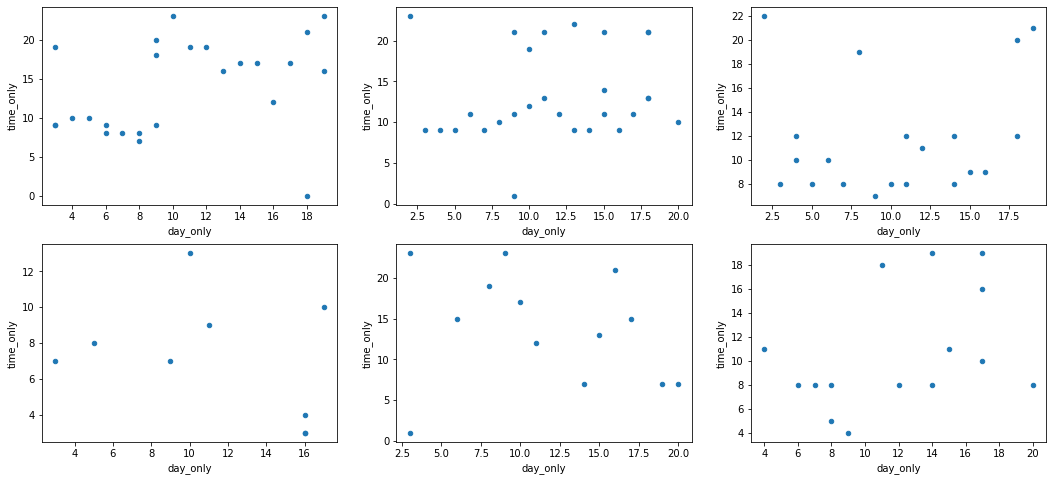

In [172]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

figure.set_size_inches(18, 8)

(poop[poop['id'] == 'gaori']).plot.scatter(x='day_only', y='time_only', ax=ax1)
(poop[poop['id'] == 'hae']).plot.scatter(x='day_only', y='time_only', ax=ax2)
(poop[poop['id'] == 'squirrel']).plot.scatter(x='day_only', y='time_only', ax=ax3)
(poop[poop['id'] == 'kairos']).plot.scatter(x='day_only', y='time_only', ax=ax4)
(poop[poop['id'] == 'panda']).plot.scatter(x='day_only', y='time_only', ax=ax5)
(poop[poop['id'] == 'wolf']).plot.scatter(x='day_only', y='time_only', ax=ax6)
plt.show()

In [ ]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');

### time 컬럼을 string 으로 변환해서 시간, 분 두개의 컬럼으로 저장

In [68]:
poop.dtypes

id              object
date            object
time            object
minute           int64
feel             int64
menstruation     int64
feel(text)      object
time_encode     object
dtype: object

In [136]:
# time 컬럼을 : 을 기준으로 나눠서 DataFrame 으로 저장
time_split = poop['time'].str.split(':', expand=True)

# 각 열을 새로운 컬럼에 저장
poop['time_only'] = time_split[0].astype(int)
poop['minute_only'] = time_split[1].astype(int)

# 확인하기
poop[['time', 'time_only', 'minute_only']].head()
poop.dtypes

id              object
date            object
time            object
minute           int64
feel             int64
menstruation     int64
feel(text)      object
time_only        int32
minute_only      int32
dtype: object

# 개인별 하루 중 화장실 간 시각

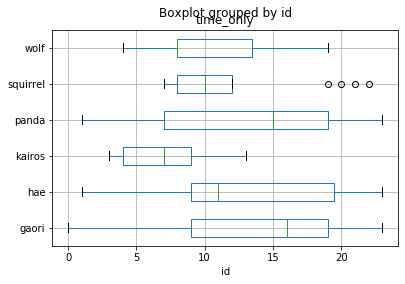

In [137]:
poop.boxplot(column='time_only', by='id', vert=False)

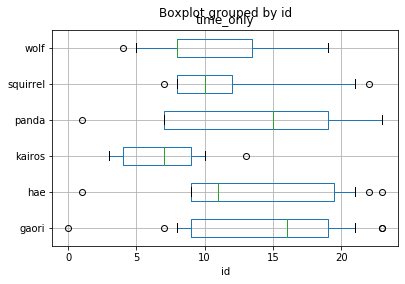

In [138]:
poop.boxplot(column='time_only', by='id', vert=False, whis=[5, 95])

# 걸린 시간

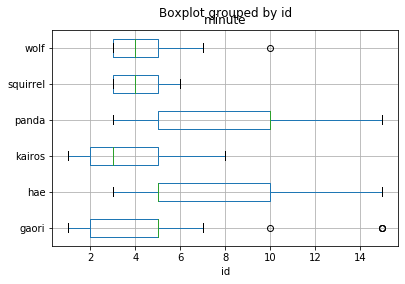

In [139]:
poop.boxplot(column='minute', by='id', vert=False)

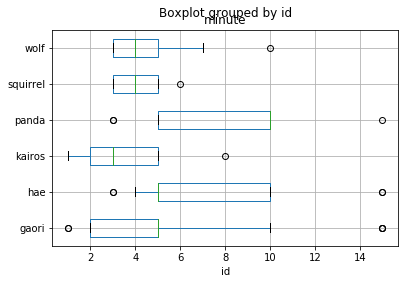

In [140]:
poop.boxplot(column='minute', by='id', vert=False, whis=[10, 90])

# 늑대 걸린시간 아웃라이어

In [178]:
poop_wolf = poop[poop['id'] == 'wolf']
poop_wolf[poop_wolf['minute'] > 8]

,id,date,time,minute,feel,menstruation,feel(text),time_only,minute_only,day_only
108,wolf,2019-08-17,19:25,10,1,0,Try,19,25,17


In [208]:
eat_wolf = eat[eat['id'] == 'wolf']
temp = eat_wolf[eat_wolf['date'] == '2019-08-16']

temp.groupby('date')['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-16,2,0,1,0,1,1,0,0,0


# 다람쥐 시간대 아웃라이어

In [266]:
poop_squirrel = poop[poop['id'] == 'squirrel']
poop_squirrel[poop_squirrel['time_only'] > 15]['date']

75    2019-08-02
82    2019-08-08
93    2019-08-18
94    2019-08-19
Name: date, dtype: object

In [263]:
temp = poop_squirrel[
    (poop_squirrel['date'] == '2019-08-07') | (poop_squirrel['date'] == '2019-08-17') | (poop_squirrel['date'] == '2019-08-18')]

temp.groupby('date').sum()

temp

,id,date,time,minute,feel,menstruation,feel(text),time_only,minute_only,day_only
81,squirrel,2019-08-07,8:00,4,3,1,Good,8,0,7
92,squirrel,2019-08-18,12:00,5,3,0,Good,12,0,18
93,squirrel,2019-08-18,20:00,3,3,0,Good,20,0,18


In [257]:
eat_squirrel = eat[eat['id'] == 'squirrel']
temp = eat_squirrel[
    (eat_squirrel['date'] == '2019-08-07') | (eat_squirrel['date'] == '2019-08-17') | (eat_squirrel['date'] == '2019-08-18')]

temp.groupby('date')['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-07,0,2,0,1,0,0,700,2,0
2019-08-17,2,1,0,0,0,0,500,1,0
2019-08-18,0,2,1,0,0,1,0,1,0


In [270]:
eat_count_squirrel= eat_squirrel.groupby('date')[
    'spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

# 차가운거 + 채소
eat_count_squirrel[(eat_count_squirrel['greens'] > 0) & (eat_count_squirrel['cold'] > 0)]

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-03,4,1,0,0,0,0,800,1,0
2019-08-04,3,3,1,0,1,2,600,1,0
2019-08-05,0,1,0,0,0,1,500,1,0
2019-08-06,1,1,0,1,0,2,400,2,0
2019-08-07,0,2,0,1,0,0,700,2,0
2019-08-08,1,1,0,1,0,2,500,2,0
2019-08-09,1,2,1,0,0,2,200,1,0
2019-08-11,3,3,0,1,0,1,800,1,0
2019-08-12,0,1,0,0,0,2,700,1,0


# 가오리 걸린시간 아웃라이어

In [249]:
poop_gaori = poop[poop['id'] == 'gaori']
poop_gaori[poop_gaori['minute'] > 8][['date', 'minute']]

,date,minute
2,2019-08-03,10
12,2019-08-09,15
13,2019-08-10,15
22,2019-08-18,15


In [236]:
eat_gaori = eat[eat['id'] == 'gaori']
temp = eat_gaori[(eat_gaori['date'] == '2019-08-02')| (eat_gaori['date'] == '2019-08-08')| 
    (eat_gaori['date'] == '2019-08-09') | (eat_gaori['date'] == '2019-08-17')]

temp.groupby('date')['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-02,2,0,0,0,1,1,400,1,0
2019-08-08,0,0,0,0,0,0,400,0,1
2019-08-09,1,0,0,0,0,2,700,1,2
2019-08-17,0,1,0,1,0,0,300,1,0


In [238]:
eat_count_gaori= eat_gaori.groupby('date')[
    'spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

# 매운거 + 우유
eat_count_gaori[(eat_count_gaori['spicy'] > 0) & (eat_count_gaori['mlik'] > 0)]

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-02,2,0,0,0,1,1,400,1,0
2019-08-03,2,0,0,0,0,1,1300,1,1
2019-08-09,1,0,0,0,0,2,700,1,2
2019-08-10,2,1,0,0,1,2,1100,0,1
2019-08-11,2,0,0,0,1,1,600,0,2


In [246]:
poop_gaori = poop[poop['id'] == 'gaori']
poop_gaori[(poop_gaori['date'] == '2019-08-04') | 
           (poop_gaori['date'] == '2019-08-11') | (poop_gaori['date'] == '2019-08-12')][['date', 'minute']]

,date,minute
3,2019-08-04,5
14,2019-08-11,5
15,2019-08-12,5


# 화장실 간 횟수

In [141]:
poop_count = poop.groupby(['id', 'date'])['feel'].count().reset_index()
poop_count.head()

,id,date,feel
0,gaori,2019-08-03,3
1,gaori,2019-08-04,1
2,gaori,2019-08-05,1
3,gaori,2019-08-06,2
4,gaori,2019-08-07,1


In [146]:
poop_day = poop_count['date'].str.split('-', expand=True)
poop_count['day_only'] = poop_day[2]

poop_count[['date', 'day_only']].head()

,date,day_only
0,2019-08-03,03
1,2019-08-04,04
2,2019-08-05,05
3,2019-08-06,06
4,2019-08-07,07


In [143]:
poop_count.dtypes

id          object
date        object
feel         int64
day_only    object
dtype: object

In [144]:
poop_count_pivoted = poop_count.pivot_table(index='date', columns='id', values='feel')
poop_count_pivoted

id,gaori,hae,kairos,panda,squirrel,wolf
date,,,,,,
2019-08-02,NaN,1.0,NaN,NaN,1.0,NaN
2019-08-03,3.0,1.0,1.0,2.0,1.0,NaN
2019-08-04,1.0,1.0,NaN,NaN,2.0,1.0
2019-08-05,1.0,1.0,1.0,NaN,1.0,NaN
2019-08-06,2.0,1.0,NaN,1.0,1.0,1.0
2019-08-07,1.0,1.0,NaN,NaN,1.0,1.0
2019-08-08,2.0,1.0,NaN,1.0,1.0,2.0
2019-08-09,3.0,3.0,1.0,1.0,1.0,1.0
2019-08-10,1.0,2.0,1.0,1.0,1.0,NaN


In [129]:
poop_count_pivoted.columns = [str(c) for c in poop_count_pivoted.columns]

poop_count_pivoted = poop_count_pivoted.reset_index()

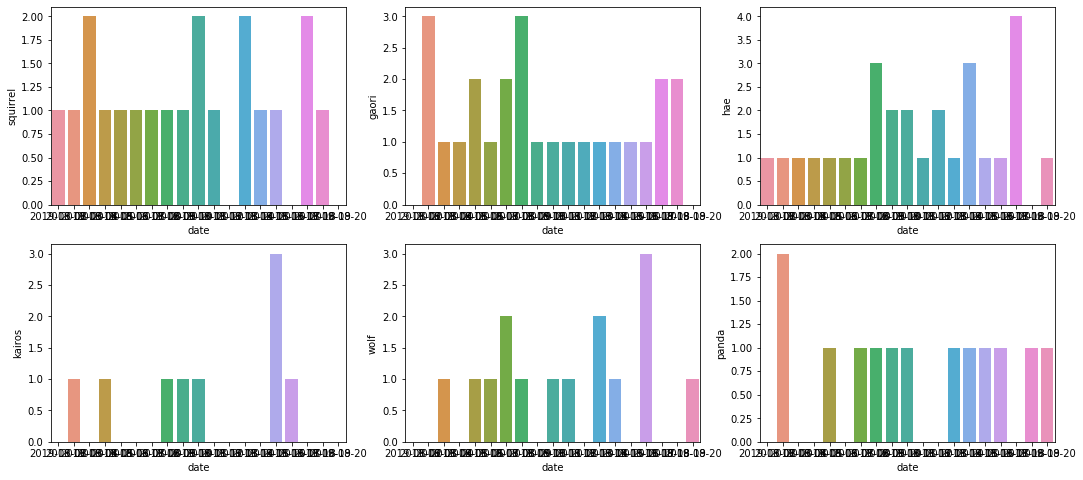

In [140]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

figure.set_size_inches(18, 8)

sns.barplot('date', 'squirrel', data=poop_count_pivoted, ax=ax1)
sns.barplot('date', 'gaori', data=poop_count_pivoted, ax=ax2)
sns.barplot('date', 'hae', data=poop_count_pivoted, ax=ax3)
sns.barplot('date', 'kairos', data=poop_count_pivoted, ax=ax4)
sns.barplot('date', 'wolf', data=poop_count_pivoted, ax=ax5)
sns.barplot('date', 'panda', data=poop_count_pivoted, ax=ax6)

# 카이로스 아웃라이어

In [219]:
poop_count_kairos = poop_count[poop_count['id'] == 'kairos']
poop_count_kairos[poop_count_kairos['feel'] == 3]

,id,date,feel,day_only
40,kairos,2019-08-16,3,16


In [225]:
eat_kairos = eat[eat['id'] == 'kairos']
temp = eat_kairos[(eat_kairos['date'] == '2019-08-15')]

temp.groupby('date')['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-15,0,3,2,0,1,0,0,0,0


### 카이로스 의심요소 먹은 날 쾌변 결과 확인

In [264]:
eat_count_kairos= eat_kairos.groupby('date')[
    'spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

# 술 + 커피 + 차가운거
eat_count_kairos[(eat_count_kairos['alcohol'] > 0) & (eat_count_kairos['coffee'] > 0) & (eat_count_kairos['cold'] > 0)]

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-08,1,2,1,0,1,0,0,0,0
2019-08-15,0,3,2,0,1,0,0,0,0


In [267]:
poop_count_kairos[(poop_count_kairos['date'] == '2019-08-09') | (poop_count_kairos['date'] == '2019-08-16')][['id', 'date', 'feel']]

,id,date,feel
37,kairos,2019-08-09,1
40,kairos,2019-08-16,3


# 늑대 아웃라이어

In [218]:
poop_count_wolf = poop_count[poop_count['id'] == 'wolf']
poop_count_wolf[poop_count_wolf['feel'] == 3]

,id,date,feel,day_only
79,wolf,2019-08-17,3,17


In [217]:
eat_wolf = eat[eat['id'] == 'wolf']
temp = eat_wolf[(eat_wolf['date'] == '2019-08-17')]

temp.groupby('date')['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-17,1,1,0,1,1,1,0,0,0


# 쾌변 여부별 카운트

In [141]:
feel_count = poop.groupby(['id', 'feel(text)'])['date'].count().reset_index()
feel_count.head()

,id,feel(text),date
0,gaori,Good,14
1,gaori,Soso,10
2,gaori,Try,1
3,hae,Good,18
4,hae,Soso,10


In [143]:
feel_count_pivoted = feel_count.pivot_table(index='feel(text)', columns='id', values='date')
feel_count_pivoted

id,gaori,hae,kairos,panda,squirrel,wolf
feel(text),,,,,,
Good,14.0,18.0,4.0,9.0,15.0,5.0
Soso,10.0,10.0,3.0,4.0,5.0,7.0
Try,1.0,NaN,2.0,NaN,NaN,3.0


In [144]:
feel_count_pivoted.columns = [str(c) for c in feel_count_pivoted.columns]

feel_count_pivoted = feel_count_pivoted.reset_index()

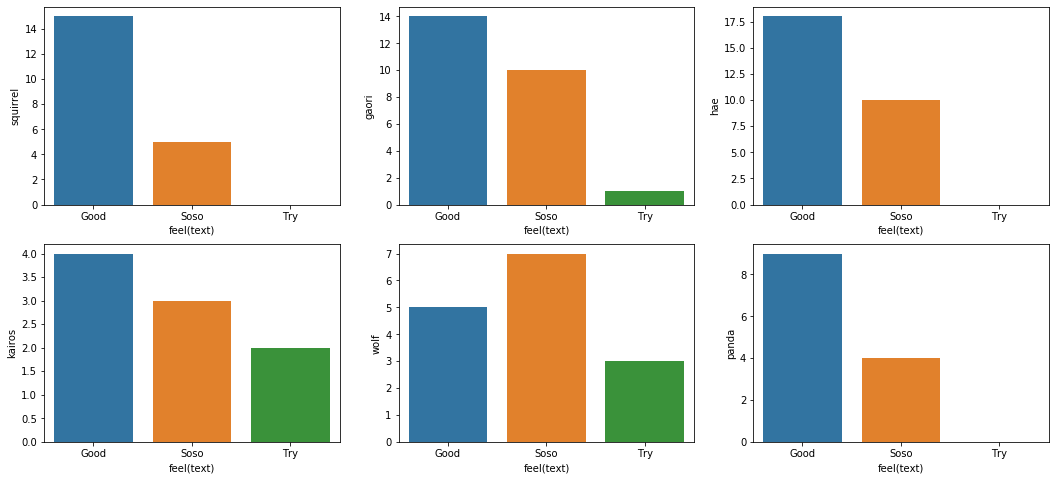

In [145]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

figure.set_size_inches(18, 8)

sns.barplot('feel(text)', 'squirrel', data=feel_count_pivoted, ax=ax1)
sns.barplot('feel(text)', 'gaori', data=feel_count_pivoted, ax=ax2)
sns.barplot('feel(text)', 'hae', data=feel_count_pivoted, ax=ax3)
sns.barplot('feel(text)', 'kairos', data=feel_count_pivoted, ax=ax4)
sns.barplot('feel(text)', 'wolf', data=feel_count_pivoted, ax=ax5)
sns.barplot('feel(text)', 'panda', data=feel_count_pivoted, ax=ax6)

# 가오리 아웃라이어 Try

In [273]:
poop_gaori[poop_gaori['feel(text)'] == 'Try']

,id,date,time,minute,feel,menstruation,feel(text),time_only,minute_only,day_only
23,gaori,2019-08-19,16:00,2,1,0,Try,16,0,19


In [274]:
eat_gaori = eat[eat['id'] == 'gaori']
temp = eat_gaori[(eat_gaori['date'] == '2019-08-18')]

temp.groupby('date')['spicy', 'cold', 'coffee', 'soda', 'alcohol', 'mlik', 'water', 'greens', 'lactobacillus'].sum()

,spicy,cold,coffee,soda,alcohol,mlik,water,greens,lactobacillus
date,,,,,,,,,
2019-08-18,0,0,0,0,0,0,900,0,0
